In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [3]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

## Printing number of Rows & Columns of Dataset 

In [51]:
rows , cols = df.shape
print('number of rows: ' , rows)
print('number of columns: ' , cols)

number of rows:  588101
number of columns:  7


## Colculate All null Values in All Columns 

In [50]:
df.isnull().any()

Unnamed:_0       False
user_id          False
test_group       False
converted        False
total_ads        False
most_ads_day     False
most_ads_hour    False
dtype: bool

## Colculate Duplicate user_id  

In [6]:
sum(df['user id'].duplicated())

0

## Colculate Number of All Unique Values in All Columns  

In [7]:
df.nunique()

Unnamed: 0       588101
user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

## Colculate All null Values in All Columns

In [8]:
df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

## Renaming All Column's name by Using '_' Seperator 

In [10]:
df.rename(columns=lambda x: x.replace(' ','_') , inplace=True)
df.head()

,Unnamed:_0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## Converting 'converted' Values (True & False) to 0 , 1 Values for Arithmetic Operations 

In [11]:
df = df.copy()  
df['converted'] = df['converted'].astype(int)

## Seperating Categorical & Numerical Columns 

In [49]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['test_group', 'most_ads_day']
Numerical Variables:
['Unnamed:_0', 'user_id', 'converted', 'total_ads', 'most_ads_hour']


## Drawing Histplots & BoxPlots to Colculating Skewness & Outliers 

Unnamed:_0
Skew : -0.0


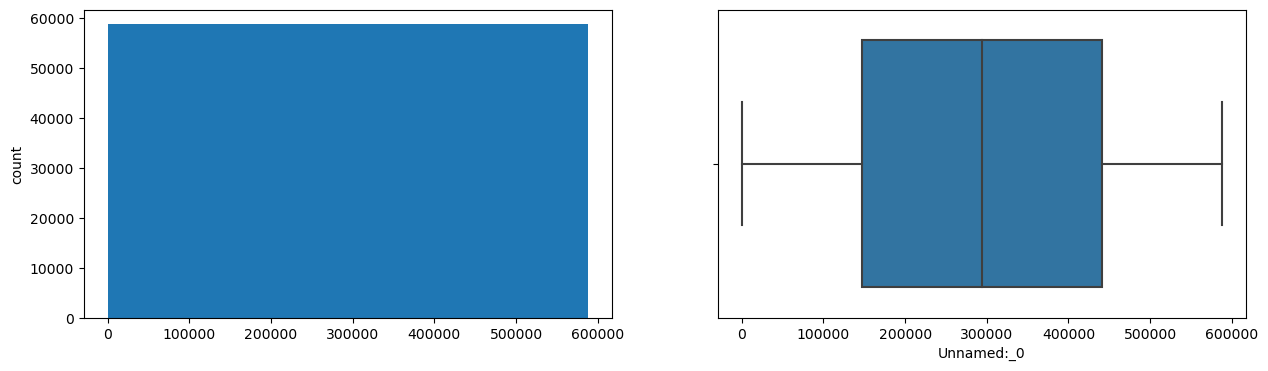

user_id
Skew : -0.1


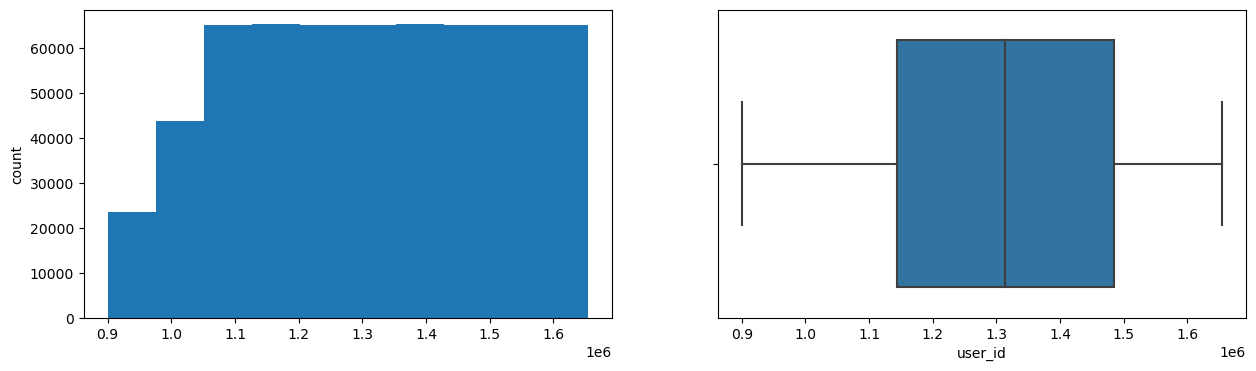

converted
Skew : 6.05


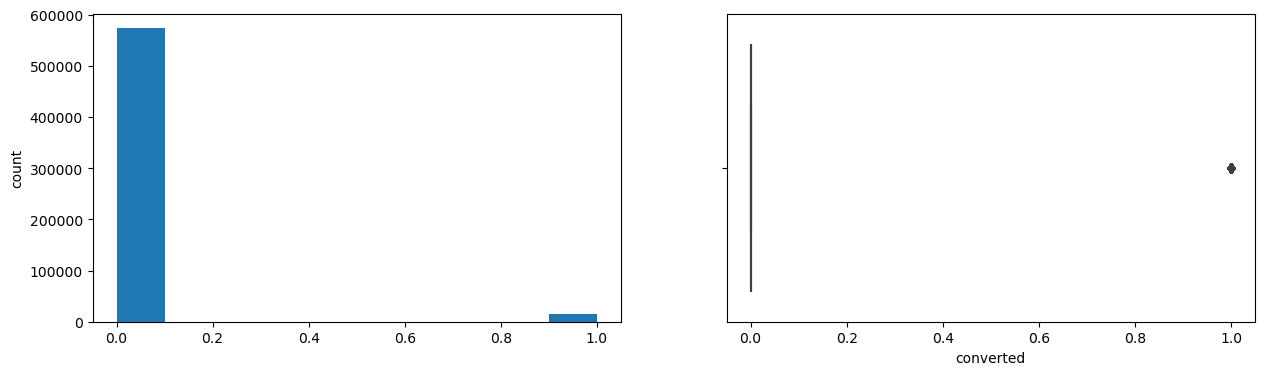

total_ads
Skew : 7.43


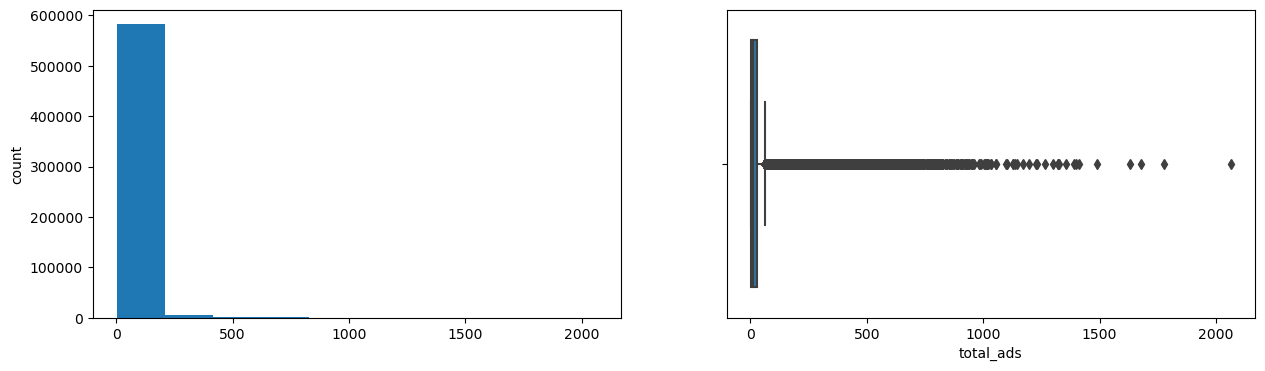

most_ads_hour
Skew : -0.34


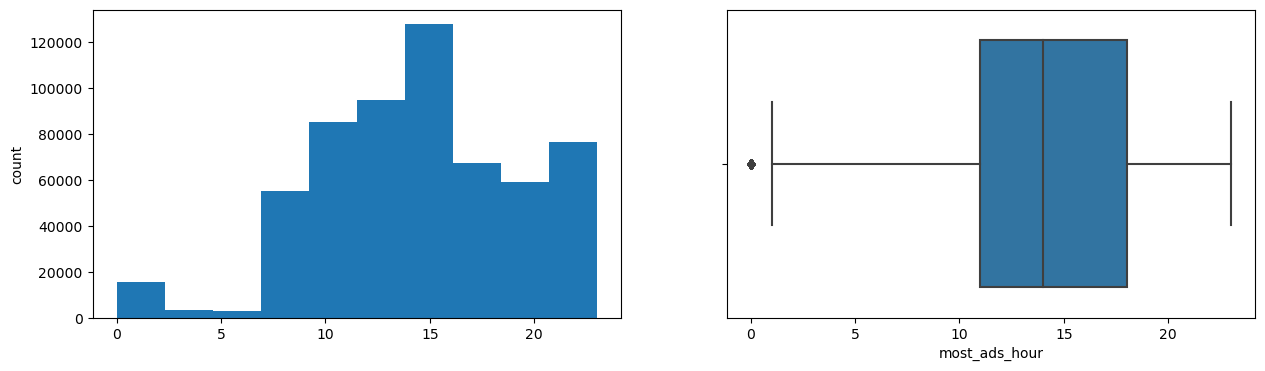

In [13]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

## Creating Hist plot on 'test_group' Column 

<Axes: >

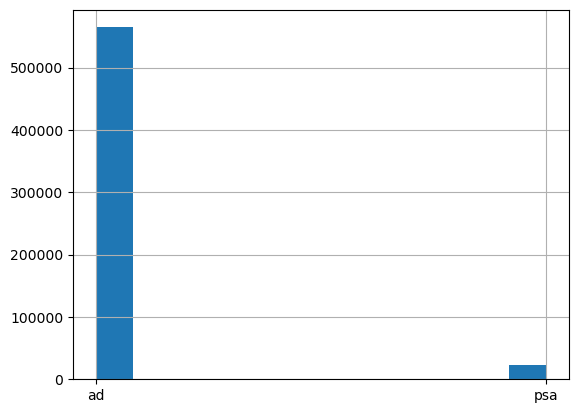

In [14]:
df['test_group'].hist(bins=12)

## Creating Hist plot on 'total_ads' Column 

<Axes: >

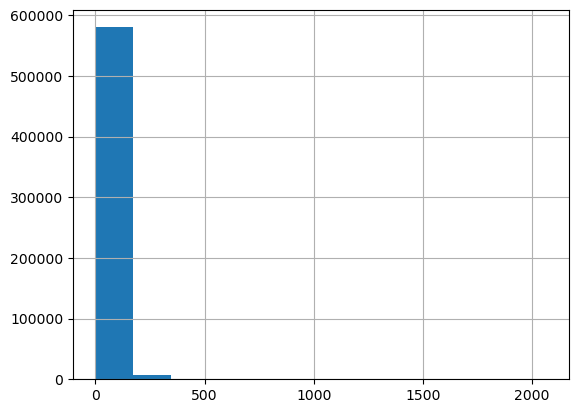

In [15]:
df['total_ads'].hist(bins=12)

## Creating Hist plot on 'most_ads_hour' Column 

<Axes: >

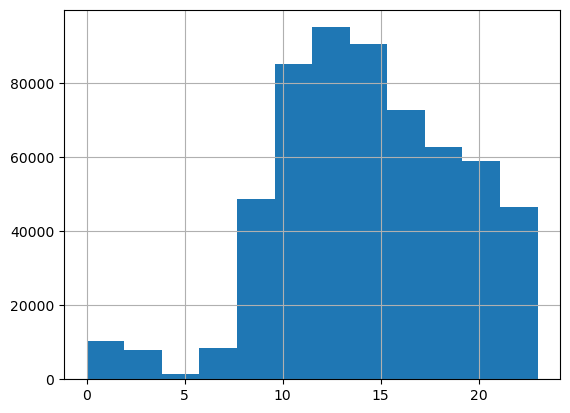

In [48]:
df['most_ads_hour'].hist(bins=12)

## Creating Hist plot on 'most_ads_day' Column 

<Axes: >

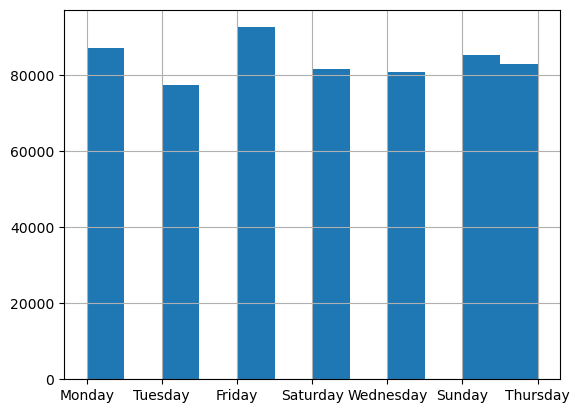

In [17]:
df['most_ads_day'].hist(bins=12)

## Creating Count plot on 'converted' Column 

<Axes: xlabel='converted', ylabel='count'>

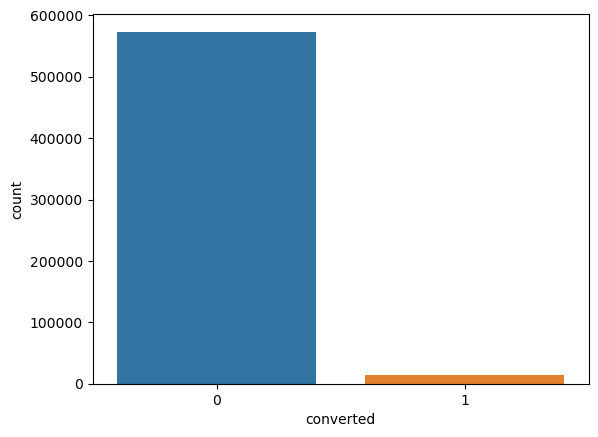

In [18]:
sns.countplot(x='converted', data=df.dropna())

## Count the frequency of unique values in the 'converted' column of a pandas DataFrame 

In [19]:
df['converted'].value_counts()

0    573258
1     14843
Name: converted, dtype: int64

In [20]:
df['converted'].mean()  * 100

2.523886203220195

## Count the frequency of unique values in the 'most_ads_day' column of a pandas DataFrame

In [21]:
df['most_ads_day'].value_counts()

Friday       92608
Monday       87073
Sunday       85391
Thursday     82982
Saturday     81660
Wednesday    80908
Tuesday      77479
Name: most_ads_day, dtype: int64

## Count the frequency of unique values in the 'most_ads_hour' column of a pandas DataFrame 

In [22]:
df['most_ads_hour'].value_counts()

13    47655
12    47298
11    46210
14    45648
15    44683
10    38939
16    37567
17    34988
18    32323
9     31004
19    30352
21    29976
20    28923
22    26432
23    20166
8     17627
7      6405
0      5536
2      5333
1      4802
3      2679
6      2068
5       765
4       722
Name: most_ads_hour, dtype: int64

In [23]:
#df = df.drop(columns=['Unnamed: 0', 'user_id'], axis=1)

## All Information About Dataset 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed:_0     588101 non-null  int64 
 1   user_id        588101 non-null  int64 
 2   test_group     588101 non-null  object
 3   converted      588101 non-null  int32 
 4   total_ads      588101 non-null  int64 
 5   most_ads_day   588101 non-null  object
 6   most_ads_hour  588101 non-null  int64 
dtypes: int32(1), int64(4), object(2)
memory usage: 29.2+ MB


## Statistically Description Of DataFrame

In [25]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed:_0,588101.0,NaN,NaN,NaN,294050.0,169770.279667,0.0,147025.0,294050.0,441075.0,588100.0
user_id,588101.0,NaN,NaN,NaN,1310692.215793,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
test_group,588101,2,ad,564577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
converted,588101.0,NaN,NaN,NaN,0.025239,0.15685,0.0,0.0,0.0,0.0,1.0
total_ads,588101.0,NaN,NaN,NaN,24.820876,43.715181,1.0,4.0,13.0,27.0,2065.0
most_ads_day,588101,7,Friday,92608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_ads_hour,588101.0,NaN,NaN,NaN,14.469061,4.834634,0.0,11.0,14.0,18.0,23.0


## Deleting All Null Rows Without Creating New DataFrame(inplace=True) 

In [26]:
df.dropna(inplace=True)

## Colculating Correlation Between All columns

In [27]:
df.corr()

C:\Users\mobinghk\AppData\Local\Temp\ipykernel_6552\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unnamed:_0,user_id,converted,total_ads,most_ads_hour
Unnamed:_0,1.000000,-0.037463,-0.104192,-0.389108,0.006232
user_id,-0.037463,1.000000,0.000635,0.012336,-0.023002
converted,-0.104192,0.000635,1.000000,0.217419,0.019674
total_ads,-0.389108,0.012336,0.217419,1.000000,-0.010837
most_ads_hour,0.006232,-0.023002,0.019674,-0.010837,1.000000


## Normalized test_group Types Count (percentage) 

In [28]:
df["test_group"].value_counts(normalize = True) * 100

ad     96.000007
psa     3.999993
Name: test_group, dtype: float64

## Sorting Dataset Values in ascending Order by Column total_ads 

In [29]:
df.sort_values(by = "total_ads", ascending = False).head()

,Unnamed:_0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
26742,26742,1184464,ad,0,2065,Friday,10
47005,47005,1637962,ad,1,1778,Tuesday,18
7187,7187,1209450,ad,1,1680,Tuesday,22
506,506,1086307,ad,0,1632,Friday,20
15334,15334,1512157,ad,1,1491,Wednesday,7


## Pivot Table By Mean & Count Aggregate Function on most_ads_day & most_ads_hour   columns appling Each test_group Types 

In [30]:
df.pivot_table(
    ["most_ads_day", "most_ads_hour"],
    ["test_group"],
    aggfunc = ["mean", "count"],
).head(10)

C:\Users\mobinghk\AppData\Local\Temp\ipykernel_6552\985894933.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(


mean        count              
           most_ads_hour most_ads_day most_ads_hour
test_group                                         
ad             14.475900       564577        564577
psa            14.304923        23524         23524

## Colculating all Statistical Criterion on total_ads Column

In [31]:
print(f" mean : {df['total_ads'].mean()}")
print(f" median : {df['total_ads'].median()}")
print(f" standard deviation : {df['total_ads'].std()}")
print(f" skewness : {df['total_ads'].skew()}")
print(f" kurtosis : {df['total_ads'].kurtosis()}")

 mean : 24.82087600599217
 median : 13.0
 standard deviation : 43.71518050444977
 skewness : 7.433113001521166
 kurtosis : 109.91798253363802


## Drawing Histogram Graph on arr_delay column by Values Less Than 200 

<Axes: >

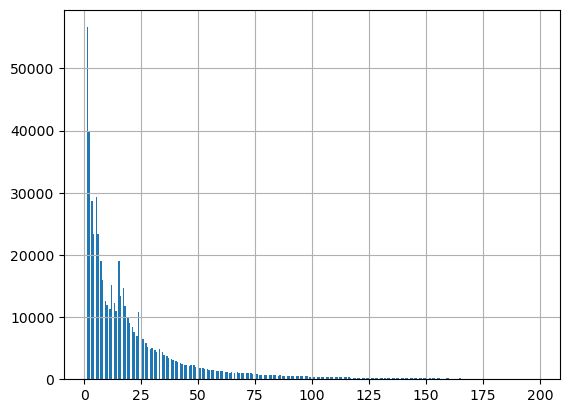

In [32]:
df['total_ads'][df['total_ads'] < 200].hist(bins=300)

In [33]:
ads = df.query('test_group == "ad"') 
psa = df.query('test_group == "psa"')


ads_ab = np.random.binomial(len(ads), df.converted.mean(), 10000) / len(ads)
psa_ab = np.random.binomial(len(psa), df.converted.mean(), 10000) / len(psa)


p_diffs = ads_ab - psa_ab

In [34]:
ab_data_diff = ads['converted'].mean() - psa['converted'].mean()
ab_data_diff

0.007692453192201517

In [35]:
(p_diffs > ab_data_diff).mean() * 100  

0.0

In [36]:
(p_diffs < ab_data_diff).mean() * 100

100.0

In [37]:
df_ads = df.query('test_group == "ad"')
df_ads['converted'].mean() * 100

2.5546559636683748

In [38]:
df_psa = df.query('test_group == "psa"')
df_psa['converted'].mean() * 100

1.785410644448223

In [39]:
df_ads.describe()

,Unnamed:_0,user_id,converted,total_ads,most_ads_hour
count,564577.000000,5.645770e+05,564577.000000,564577.000000,564577.000000
mean,293914.467114,1.327314e+06,0.025547,24.823365,14.475900
std,168039.202368,1.889181e+05,0.157778,43.750456,4.841808
min,0.000000,1.000000e+06,0.000000,1.000000,0.000000
25%,149003.000000,1.163686e+06,0.000000,4.000000,11.000000
50%,294089.000000,1.327362e+06,0.000000,13.000000,14.000000
75%,438890.000000,1.490914e+06,0.000000,27.000000,18.000000
max,588100.000000,1.654483e+06,1.000000,2065.000000,23.000000


In [40]:
df_psa.describe()

,Unnamed:_0,user_id,converted,total_ads,most_ads_hour
count,23524.000000,23524.000000,23524.000000,23524.000000,23524.000000
mean,297302.795018,911761.500000,0.017854,24.761138,14.304923
std,206995.969959,6790.938202,0.132424,42.860720,4.656239
min,18.000000,900000.000000,0.000000,1.000000,0.000000
25%,83618.250000,905880.750000,0.000000,4.000000,11.000000
50%,293321.500000,911761.500000,0.000000,12.000000,14.000000
75%,526178.750000,917642.250000,0.000000,26.000000,18.000000
max,588081.000000,923523.000000,1.000000,907.000000,23.000000


In [44]:
df.groupby(['test_group', 'converted']).count()['user_id'].unstack('converted')

converted,0,1
test_group,,
ad,550154,14423
psa,23104,420


## Creating KDE plot on converted values (0,1) seperated by psa & ad group

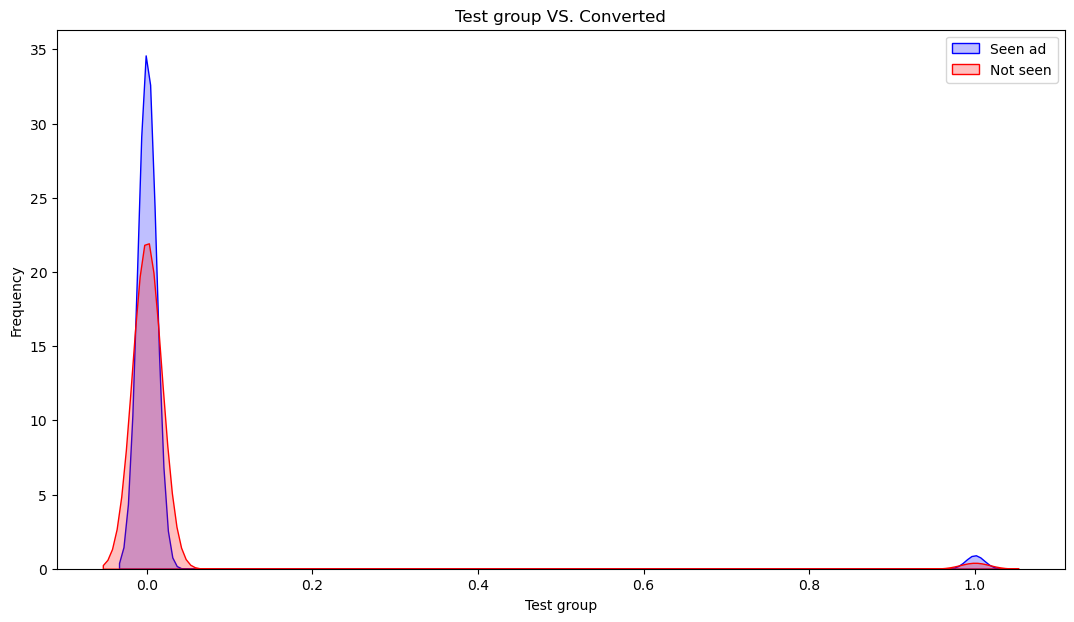

In [45]:
fig = plt.figure(figsize=(13,7))
ax = sns.kdeplot(df.loc[(df['test_group'] == 'ad'), 'converted'], color='b', fill=True, label='Seen ad')
ax = sns.kdeplot(df.loc[(df['test_group'] == 'psa'), 'converted'], color='r', fill=True, label='Not seen')
ax.set(xlabel='Test group', ylabel='Frequency')
plt.title('Test group VS. Converted')
plt.legend();

## T-test Independent on ad & psa group 

The independent t-test, also called the two sample t-test, independent-samples t-test or student's t-test, is an inferential statistical test that determines whether there is a statistically significant difference between the means in two unrelated groups.

<img src="ttest.png">

In [46]:
def ttest(data1, data2):
    t_statistic, p_value = stats.ttest_ind(data1, data2)
    return t_statistic, p_value

def main():

    # Create two groups of users
    ad_group = df[df["test_group"] == "ad"]
    psa_group = df[df["test_group"] == "psa"]

    # Calculate the mean number of ads seen for each group
    ad_mean = ad_group["converted"].mean()
    psa_mean = psa_group["converted"].mean()

    # Perform a independent t-test to compare the means of the two groups
    t_statistic, p_value = ttest(ad_group["converted"], psa_group["converted"])

    # Print the results
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
    if p_value < 0.05:
        print("There is a statistically significant difference in the conversion rates of the two groups.")
    else:
        print("There is no statistically significant difference in the conversion rates of the two groups.")

if __name__ == "__main__":
    main()

T-statistic: 7.37040597428566
P-value: 1.7033052627831264e-13
There is a statistically significant difference in the conversion rates of the two groups.


  ##  Chi_Square Test 

Chi-square analysis is applied to categorical variables and is especially useful when those variables are nominal (where order doesn't matter, like marital status or gender).

<img src="chisq.png"/>

In [47]:
ad_group = df[df["test_group"] == "ad"]
psa_group = df[df["test_group"] == "psa"]

# Calculate the conversion rate for each group

ad_conversion_rate = len(ad_group[ad_group["converted"] == 1]) / len(ad_group)
psa_conversion_rate = len(psa_group[psa_group["converted"] == 1]) / len(psa_group)

contingency_table = pd.crosstab(df["test_group"], df["converted"])
chi2, p_value, degrees_of_freedom, expected_values = stats.chi2_contingency(contingency_table)

print("Ad conversion rate:", ad_conversion_rate)
print("PSA conversion rate:", psa_conversion_rate)
print("Degree Of Freedom:", degrees_of_freedom)
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)

# If the p-value is less than 0.05, then we can conclude that there is a statistically significant difference in the conversion rates of the two groups.

if p_value < 0.05:
    print("There is a statistically significant difference in the conversion rates of the two groups.")
else:
    print("There is no statistically significant difference in the conversion rates of the two groups.")

Ad conversion rate: 0.025546559636683747
PSA conversion rate: 0.01785410644448223
Degree Of Freedom: 1
Chi-squared statistic: 54.005823883685245
P-value: 1.9989623063390075e-13
There is a statistically significant difference in the conversion rates of the two groups.


## Final Solution

The chi-squared statistic of 54.005823883685245 is much larger than the critical value of 3.841, which is the cutoff for significance at the 0.05 level. This means that the difference between the two conversion rates is very likely to be real and not due to chance.

The p-value of 1.9989623063390075e-13 is also very small. This means that there is a very small probability that the difference between the two conversion rates could have occurred by chance.

In other words, the chi-squared statistic and p-value suggest that there is strong evidence to conclude that there is a significant difference between the ad conversion rate and the PSA conversion rate.

In your case, the chi-squared statistic is greater than the critical value and the p-value is much less than 0.05, so you can conclude that the difference between the two conversion rates is significant at the 0.05 level.